# PyCaretModel

This notebook uses **PyCaret** to predict stock prices for **Apple (AAPL)** and **Microsoft (MSFT)** using historical data.

## Steps:
1. **Data Import**: Load cleaned stock data for Apple and Microsoft from Google Drive.
2. **Data Preprocessing**: Remove missing values and separate features and target columns (`close_aapl` for Apple and `close_msft` for Microsoft).
3. **Model Training**: Use **PyCaret** to set up and train regression models, selecting the best-performing model.
4. **Model Evaluation**: Predict stock prices and calculate metrics such as **MAE**, **MSE**, **RMSE**, and **R-squared**.
5. **Results Visualization**: Plot actual vs predicted stock prices.
6. **Save Results**: Save model metrics and predictions to CSV files in Google Drive.


_This notebook was created by Huma Raja Liaqat_


_This notebook was created in Google Colab because I was unable to set up the proper environment to install PyCaret in my local Python setup._

In [1]:
pip install pycaret

This code imports necessary libraries for regression tasks and working with Google Colab:

1. **PyCaret for Regression:**
   - `from pycaret.regression import *` imports all the functions from PyCaret's regression module, which is a machine learning library that simplifies the process of training and deploying regression models.

2. **Pandas:**
   - `import pandas as pd` imports the `pandas` library, which is commonly used for data manipulation and analysis.

3. **Google Colab Drive Integration:**
   - `from google.colab import drive` allows access to Google Drive from within a Google Colab environment, enabling reading and writing of files stored in Drive.


In [2]:
from pycaret.regression import *
import pandas as pd
from google.colab import drive

This code demonstrates how to load, clean, and train a regression model using PyCaret:

1. **Mounting Google Drive:**
   - `drive.mount('/content/drive')` mounts Google Drive in Google Colab, allowing access to files stored in the user's Drive.

2. **Loading Data:**
   - `pd.read_csv()` is used to load the AAPL cleaned data (`AAPL_cleaned_data.csv`) into a pandas DataFrame `dataAAPL`.

3. **Data Cleaning:**
   - `dropna(inplace=True)` removes any rows containing missing values from the DataFrame.

4. **Preparing Features and Target:**
   - The target column (`'close_aapl'`) is defined, and `features` is created by dropping the target column and the 'date' column from the data.
   - The `data_for_model` DataFrame is created by combining the selected features and the target column.

5. **PyCaret Setup:**
   - The `setup()` function from PyCaret is used to initialize the regression environment with:
     - The `data_for_model` DataFrame.
     - The target column (`'close_aapl'`).
     - A fixed `session_id` for reproducibility.
     - Normalization of features.

6. **Model Comparison:**
   - `compare_models()` automatically compares different regression models and selects the best-performing one.

7. **Saving the Best Model:**
   - The best model identified by `compare_models()` is saved using the `save_model()` function, storing it with the name `'best_pycaret_model'`.

8. **Printing the Best Model:**
   - The best model is printed for review.


In [6]:
drive.mount('/content/drive')
dataAAPL = pd.read_csv('/content/drive/My Drive/AAPL_cleaned_data.csv')

dataAAPL.dropna(inplace=True)

target_column = 'close_aapl'
features = dataAAPL.drop(columns=[target_column, 'date'])
data_for_model = dataAAPL[features.columns.tolist() + [target_column]]

regression_setup = setup(
    data=data_for_model,
    target=target_column,
    session_id=123,
    normalize=True,
    verbose=False
)

best_model = compare_models()

print(best_model)

save_model(best_model, 'best_pycaret_model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0264,0.0046,0.0671,1.0000,0.0043,0.0107,0.7770
lar,Least Angle Regression,0.0264,0.0046,0.0671,1.0000,0.0043,0.0107,0.0360
br,Bayesian Ridge,0.0264,0.0046,0.0671,1.0000,0.0043,0.0107,0.0390
huber,Huber Regressor,0.0254,0.0048,0.0679,1.0000,0.0037,0.0068,0.1100
rf,Random Forest Regressor,0.0265,0.0055,0.0733,1.0000,0.0035,0.0054,3.0830
et,Extra Trees Regressor,0.0247,0.0050,0.0698,1.0000,0.0032,0.0050,1.3250
lightgbm,Light Gradient Boosting Machine,0.0442,0.0110,0.1049,0.9999,0.0071,0.0151,0.3220
gbr,Gradient Boosting Regressor,0.0444,0.0102,0.1004,0.9999,0.0087,0.0202,1.2620
dt,Decision Tree Regressor,0.0333,0.0097,0.0968,0.9999,0.0047,0.0068,0.0620
par,Passive Aggressive Regressor,0.0629,0.0142,0.1184,0.9999,0.0206,0.0854,0.0360


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['adj close_aapl', 'high_aapl',
                                              'low_aapl', 'open_aapl',
                                              'volume_aapl'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LinearRegression(n_jobs=-1))]),
 'best_pycaret_model.pkl')

This code loads the best PyCaret regression model, makes predictions on AAPL stock data, and visualizes the results:

1. **Loading the Saved Model:**
   - `load_model('best_pycaret_model')` loads the previously saved best regression model from PyCaret.

2. **Loading and Preparing Data:**
   - The AAPL cleaned data is loaded from Google Drive using `pd.read_csv()`.
   - `dropna(inplace=True)` is used to remove any rows with missing values.
   - The `'date'` column is converted to a `datetime` format using `pd.to_datetime()`.

3. **Feature Selection:**
   - The features for prediction are selected by dropping the target column (`'close_aapl'`).
   - The relevant features are stored in the `data_for_prediction_apple` DataFrame.

4. **Model Prediction:**
   - The `predict_model()` function from PyCaret is used to make predictions on the input data (`data_for_prediction_apple`).
   - The predicted values are stored in `predicted_apple`, while the actual stock prices are stored in `actual_apple`.

5. **Visualization:**
   - A plot is created to compare the actual and predicted stock prices over time.
   - The actual prices are shown in blue, and the predicted prices are shown in red (dashed line).
   - The plot includes labels, a title, and a legend to distinguish the two series.
   - `plt.xticks(rotation=45)` rotates the x-axis labels for better readability.
   - The plot is displayed with a grid and tight layout for better presentation.

This workflow demonstrates how to use a pre-trained model to predict stock prices and visualize the results.


Transformation Pipeline and Model Successfully Loaded


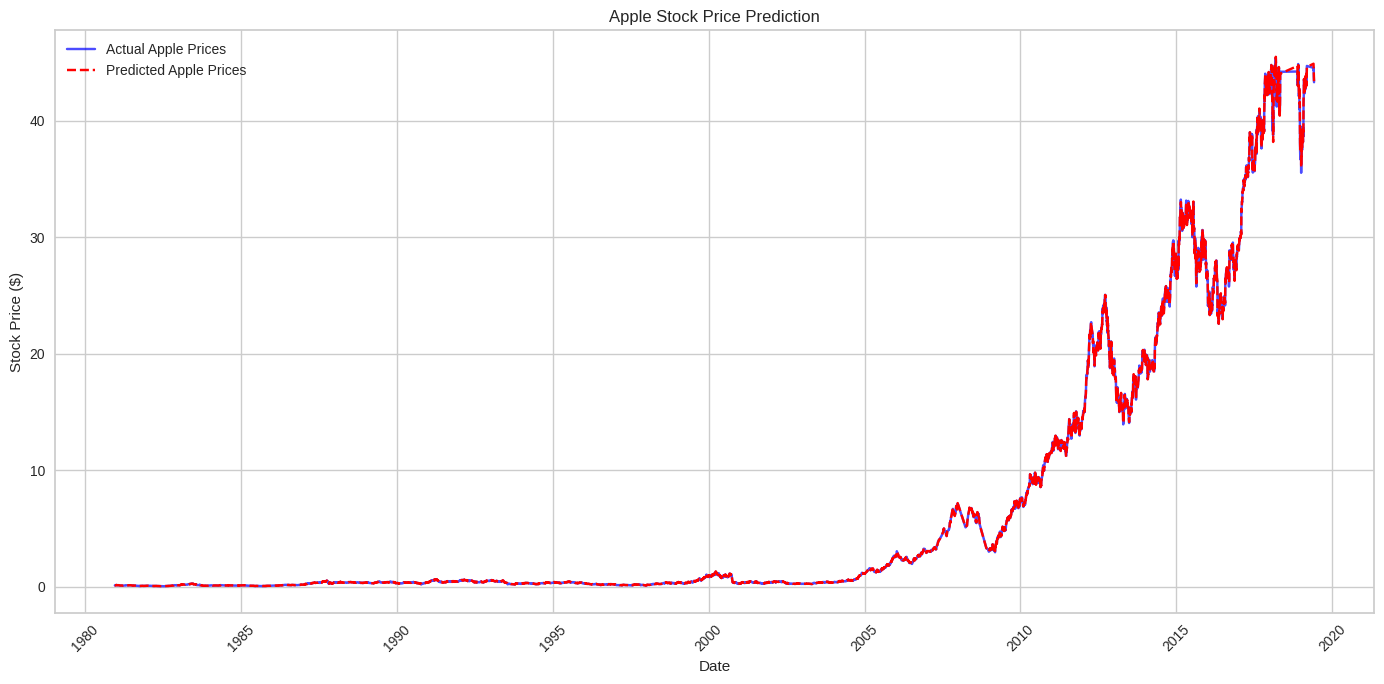

In [7]:
from pycaret.regression import load_model, predict_model
import pandas as pd
import matplotlib.pyplot as plt

loaded_model = load_model('best_pycaret_model')

apple_data_cleaned = pd.read_csv('/content/drive/My Drive/AAPL_cleaned_data.csv')
apple_data_cleaned.dropna(inplace=True)
apple_data_cleaned['date'] = pd.to_datetime(apple_data_cleaned['date'])

features_apple = apple_data_cleaned.drop(columns=[target_column])
data_for_prediction_apple = apple_data_cleaned[features_apple.columns.tolist()]

data_for_prediction_apple.reset_index(inplace=True)
predictions_apple = predict_model(loaded_model, data=data_for_prediction_apple)

predicted_apple = predictions_apple['prediction_label']
actual_apple = apple_data_cleaned[target_column]

plt.figure(figsize=(14, 7))
plt.plot(apple_data_cleaned['date'], actual_apple, label='Actual Apple Prices', color='blue', alpha=0.7)
plt.plot(apple_data_cleaned['date'], predicted_apple, label='Predicted Apple Prices', color='red', linestyle='--')
plt.title("Apple Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This code calculates and prints several performance metrics to evaluate the accuracy of the Apple stock price predictions:

1. **Importing Evaluation Metrics:**
   - `mean_absolute_error`, `mean_squared_error`, and `r2_score` are imported from `sklearn.metrics` to compute different error metrics.
   - `numpy` is imported for calculating the square root in the RMSE formula.

2. **Prediction vs Actual Values:**
   - The predicted values are stored in `predicted_apple` from the `predictions_apple` DataFrame.
   - The actual values (`actual_apple`) are extracted from the original cleaned data (`apple_data_cleaned`) using the target column (`'close_aapl'`).

3. **Metrics Calculation:**
   - **Mean Absolute Error (MAE)** measures the average magnitude of the errors in the predictions (lower values are better).
   - **Mean Squared Error (MSE)** calculates the average of the squares of the errors (lower values are better).
   - **Root Mean Squared Error (RMSE)** is the square root of MSE and gives an error metric in the same units as the stock price (lower values are better).
   - **R-squared (R²)** measures how well the model’s predictions match the actual values (values closer to 1 indicate better performance).

4. **Displaying the Results:**
   - The calculated errors are printed, providing insight into the model's performance.


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

predicted_apple = predictions_apple['prediction_label']
actual_apple = apple_data_cleaned[target_column]

mae_apple = mean_absolute_error(actual_apple, predicted_apple)
mse_apple = mean_squared_error(actual_apple, predicted_apple)
rmse_apple = np.sqrt(mse_apple)
r2_apple = r2_score(actual_apple, predicted_apple)

print(f"\nApple Stock Prediction Errors:")
print(f"Mean Absolute Error (MAE): {mae_apple:.2f}")
print(f"Mean Squared Error (MSE): {mse_apple:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_apple:.2f}")
print(f"R-squared (R²): {r2_apple:.2f}")


Apple Stock Prediction Errors:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.07
R-squared (R²): 1.00


This code saves the evaluation metrics of the Apple stock price prediction model into a CSV file on Google Drive:

1. **Results Preparation:**
   - A dictionary `results_apple` is created containing the performance metrics (`MAE`, `MSE`, `RMSE`, and `R-squared`) along with their corresponding values.
   - The dictionary is then converted into a pandas DataFrame (`results_df_apple`) for easier handling and saving.

2. **Mounting Google Drive:**
   - `drive.mount('/content/drive')` is used to mount Google Drive within Google Colab, allowing the code to read and write files stored in the Drive.

3. **File Path Definition:**
   - The output file path is defined as `'/content/drive/My Drive/Apple_PyCaret_Model_Results.csv'`, which saves the results in the root of the user's Google Drive.

4. **Saving the Results:**
   - `results_df_apple.to_csv()` saves the DataFrame containing the metrics to the specified file in CSV format, without including the index (`index=False`) and using UTF-8 encoding.

5. **Confirmation Message:**
   - A message is printed to confirm that the results have been successfully saved to the specified file in Google Drive.


In [16]:
results_apple = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae_apple, mse_apple, rmse_apple, r2_apple]
}

results_df_apple = pd.DataFrame(results_apple)

from google.colab import drive
drive.mount('/content/drive')

output_file = '/content/drive/My Drive/Apple_PyCaret_Model_Results.csv'

results_df_apple.to_csv(output_file, index=False, encoding='utf-8')

print(f"Results saved to '{output_file}'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Results saved to '/content/drive/My Drive/Apple_PyCaret_Model_Results.csv'


This code demonstrates how to load, clean, and train a regression model for Microsoft (MSFT) stock prices using PyCaret:

1. **Mounting Google Drive:**
   - `drive.mount('/content/drive')` mounts Google Drive in Google Colab, allowing access to files stored in the user's Drive.

2. **Loading and Cleaning Data:**
   - `pd.read_csv()` is used to load the cleaned Microsoft stock data (`MSFT_cleaned_data.csv`) into a pandas DataFrame (`dataMSFT`).
   - `dropna(inplace=True)` is used to remove any rows containing missing values.

3. **Preparing Features and Target:**
   - The target column (`'close_msft'`) is defined, and `features` is created by dropping the target column and the `'date'` column.
   - The `data_for_model` DataFrame is created by combining the selected features and the target column.

4. **PyCaret Setup:**
   - The `setup()` function from PyCaret is used to initialize the regression environment with:
     - The `data_for_model` DataFrame.
     - The target column (`'close_msft'`).
     - A fixed `session_id` for reproducibility.
     - Normalization of features to scale them between 0 and 1.

5. **Model Comparison:**
   - The `compare_models()` function automatically compares different regression models and selects the best-performing one.

6. **Saving the Best Model:**
   - The best model identified by `compare_models()` is saved using the `save_model()` function, storing it with the name `'best_pycaret_model'`.

7. **Printing the Best Model:**
   - The best model is printed for review.


In [13]:
drive.mount('/content/drive')
dataMSFT = pd.read_csv('/content/drive/My Drive/MSFT_cleaned_data.csv')

dataMSFT.dropna(inplace=True)

target_column = 'close_msft'
features = dataMSFT.drop(columns=[target_column, 'date'])
data_for_model = dataMSFT[features.columns.tolist() + [target_column]]

regression_setup = setup(
    data=data_for_model,
    target=target_column,
    session_id=123,
    normalize=True,
    verbose=False
)

best_model = compare_models()

print(best_model)

save_model(best_model, 'best_pycaret_model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1186,0.0407,0.2006,0.9999,0.0065,0.0086,0.5570
huber,Huber Regressor,0.1176,0.0405,0.2003,0.9999,0.0062,0.0067,0.0800
rf,Random Forest Regressor,0.1068,0.0366,0.1906,0.9999,0.0055,0.0040,2.5960
et,Extra Trees Regressor,0.1068,0.0342,0.1843,0.9999,0.0053,0.0038,1.0900
lar,Least Angle Regression,0.1186,0.0407,0.2006,0.9999,0.0065,0.0086,0.0600
br,Bayesian Ridge,0.1186,0.0407,0.2006,0.9999,0.0065,0.0086,0.0470
dt,Decision Tree Regressor,0.1353,0.0662,0.2550,0.9998,0.0074,0.0050,0.0600
lightgbm,Light Gradient Boosting Machine,0.1585,0.0840,0.2869,0.9998,0.0097,0.0113,0.8240
gbr,Gradient Boosting Regressor,0.1839,0.0865,0.2933,0.9998,0.0119,0.0166,1.2870
ridge,Ridge Regression,0.1519,0.0632,0.2503,0.9998,0.0103,0.0162,0.0580


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['adj close_msft', 'high_msft',
                                              'low_msft', 'open_msft',
                                              'volume_msft'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LinearRegression(n_jobs=-1))]),
 'best_pycaret_model.pkl')

This code loads the best PyCaret regression model, makes predictions on Microsoft (MSFT) stock data, and visualizes the results:

1. **Loading the Saved Model:**
   - `load_model('best_pycaret_model')` loads the previously saved best regression model from PyCaret.

2. **Loading and Preparing Data:**
   - The cleaned Microsoft stock data is loaded from Google Drive using `pd.read_csv()`.
   - `dropna(inplace=True)` removes any rows with missing values.
   - The `'date'` column is converted to a `datetime` format using `pd.to_datetime()` for proper handling in the plot.

3. **Feature Selection:**
   - The target column (`'close_msft'`) is defined, and the features are selected by dropping the target column from the DataFrame.
   - The relevant features are stored in `data_for_prediction_microsoft` for use in the prediction.

4. **Model Prediction:**
   - The `predict_model()` function from PyCaret is used to make predictions based on the input data (`data_for_prediction_microsoft`).
   - The predicted values are stored in `predicted_microsoft`, while the actual values (`actual_microsoft`) are taken from the original cleaned data.

5. **Visualization:**
   - A plot is created to compare the actual and predicted stock prices over time.
   - The actual prices are displayed in blue, and the predicted prices are shown in red (with a dashed line).
   - The plot includes a title, axis labels, and a legend to differentiate the actual and predicted values.
   - The x-axis labels are rotated for readability (`plt.xticks(rotation=45)`), and a grid is added for better visualization.

This process shows how to use a pre-trained model to predict stock prices and visualize the results.


Transformation Pipeline and Model Successfully Loaded


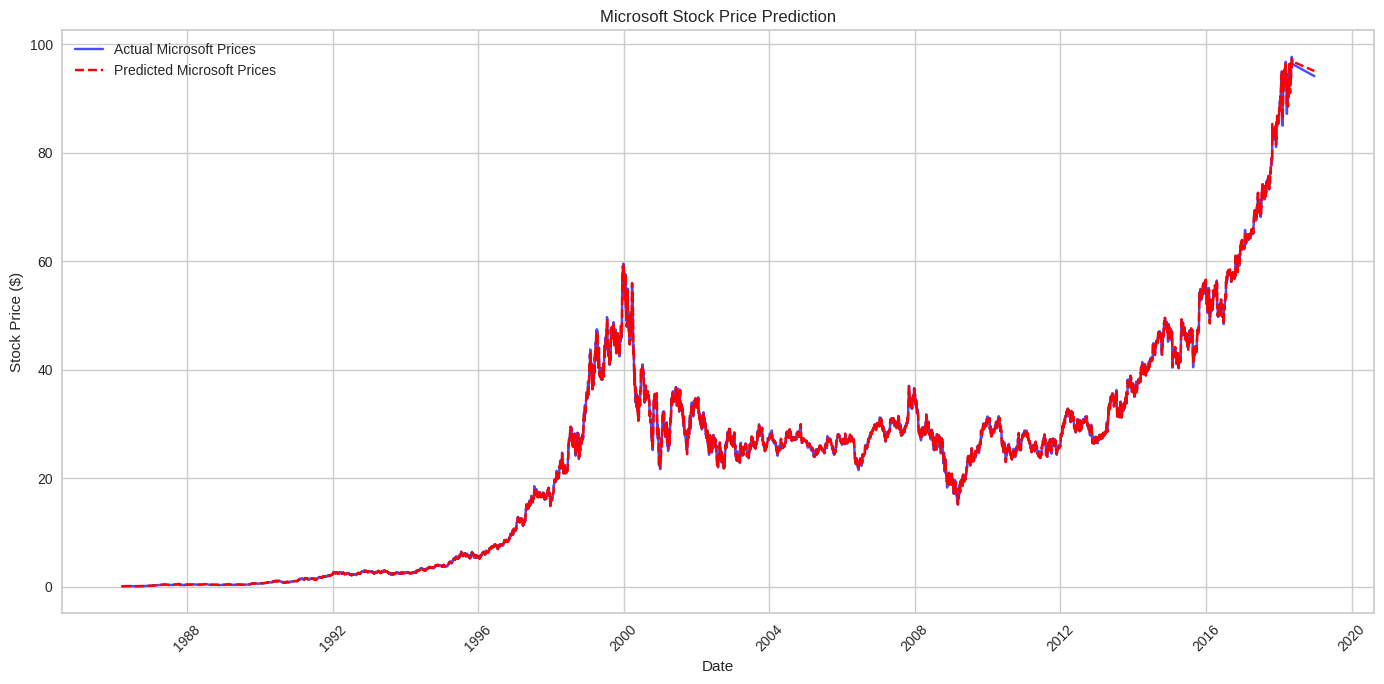

In [14]:
from pycaret.regression import load_model, predict_model
import pandas as pd
import matplotlib.pyplot as plt

loaded_model = load_model('best_pycaret_model')

microsoft_data_cleaned = pd.read_csv('/content/drive/My Drive/MSFT_cleaned_data.csv')
microsoft_data_cleaned.dropna(inplace=True)

microsoft_data_cleaned['date'] = pd.to_datetime(microsoft_data_cleaned['date'])
target_column = 'close_msft'

features_microsoft = microsoft_data_cleaned.drop(columns=[target_column])
data_for_prediction_microsoft = microsoft_data_cleaned[features_microsoft.columns.tolist()]

data_for_prediction_microsoft.reset_index(inplace=True)

predictions_microsoft = predict_model(loaded_model, data=data_for_prediction_microsoft)

predicted_microsoft = predictions_microsoft['prediction_label']
actual_microsoft = microsoft_data_cleaned[target_column]

plt.figure(figsize=(14, 7))
plt.plot(microsoft_data_cleaned['date'], actual_microsoft, label='Actual Microsoft Prices', color='blue', alpha=0.7)
plt.plot(microsoft_data_cleaned['date'], predicted_microsoft, label='Predicted Microsoft Prices', color='red', linestyle='--')
plt.title("Microsoft Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This code calculates and prints the evaluation metrics for the Microsoft stock price predictions:

1. **Importing Evaluation Metrics:**
   - The code imports `mean_absolute_error`, `mean_squared_error`, and `r2_score` from `sklearn.metrics` to compute various error metrics.
   - `numpy` is imported to calculate the square root of MSE for RMSE.

2. **Prediction vs Actual Values:**
   - `predicted_microsoft` contains the predicted values from the `predictions_microsoft` DataFrame.
   - `actual_microsoft` contains the actual values from the target column (`'close_msft'`) in the cleaned Microsoft stock data.

3. **Metrics Calculation:**
   - **Mean Absolute Error (MAE)** measures the average magnitude of the errors between predicted and actual values. Lower values indicate better accuracy.
   - **Mean Squared Error (MSE)** calculates the average of the squared errors. Smaller values indicate better model performance.
   - **Root Mean Squared Error (RMSE)** is the square root of MSE, bringing the error metric back to the same scale as the stock prices. Lower values are better.
   - **R-squared (R²)** indicates how well the model’s predictions fit the actual values. A value closer to 1 means the model fits the data well.

4. **Displaying the Results:**
   - The metrics are printed to the console, providing insights into the performance of the model for predicting Microsoft stock prices.


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

predicted_microsoft = predictions_microsoft['prediction_label']
actual_microsoft = microsoft_data_cleaned[target_column]

mae_microsoft = mean_absolute_error(actual_microsoft, predicted_microsoft)
mse_microsoft = mean_squared_error(actual_microsoft, predicted_microsoft)
rmse_microsoft = np.sqrt(mse_microsoft)
r2_microsoft = r2_score(actual_microsoft, predicted_microsoft)

print(f"Microsoft Stock Prediction Errors:")
print(f"Mean Absolute Error (MAE): {mae_microsoft:.2f}")
print(f"Mean Squared Error (MSE): {mse_microsoft:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_microsoft:.2f}")
print(f"R-squared (R²): {r2_microsoft:.2f}")

Microsoft Stock Prediction Errors:
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20
R-squared (R²): 1.00


This code saves the evaluation metrics of the Microsoft stock price prediction model into a CSV file on Google Drive:

1. **Results Preparation:**
   - A dictionary `results_microsoft` is created containing the performance metrics (`MAE`, `MSE`, `RMSE`, and `R-squared`) along with their corresponding values.
   - The dictionary is then converted into a pandas DataFrame (`results_df_microsoft`) for easier handling and saving.

2. **Mounting Google Drive:**
   - `drive.mount('/content/drive')` mounts Google Drive within Google Colab, providing access to the user's Drive for saving files.

3. **File Path Definition:**
   - The output file path is defined as `'/content/drive/My Drive/Microsoft_PyCaret_Model_Results.csv'`, where the results will be saved in the root directory of the user's Google Drive.

4. **Saving the Results:**
   - `results_df_microsoft.to_csv()` is used to save the DataFrame containing the metrics to the specified file in CSV format, without including the index (`index=False`) and using UTF-8 encoding.

5. **Confirmation Message:**
   - A message is printed to confirm that the results have been successfully saved to the specified file in Google Drive.


In [17]:
results_microsoft = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae_microsoft, mse_microsoft, rmse_microsoft, r2_microsoft]
}

results_df_microsoft = pd.DataFrame(results_microsoft)

from google.colab import drive
drive.mount('/content/drive')

output_file_microsoft = '/content/drive/My Drive/Microsoft_PyCaret_Model_Results.csv'

results_df_microsoft.to_csv(output_file_microsoft, index=False, encoding='utf-8')

print(f"Results saved to '{output_file_microsoft}'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Results saved to '/content/drive/My Drive/Microsoft_PyCaret_Model_Results.csv'
